# BCG Consultation

### Done By: Soorya Parthiban
LinkedIn: https://www.linkedin.com/in/sooryaprakashparthiban/

### Importing the required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the datasets

In [3]:
customer_attributes_df = pd.read_csv(r"D:\02_Internship\01_ Virtual Internships AU\BCG Consultants\Task 2\Data\ml_case_training_data.csv")
customer_history_df = pd.read_csv(r"D:\02_Internship\01_ Virtual Internships AU\BCG Consultants\Task 2\Data\ml_case_training_hist_data.csv")
customer_churn_df = pd.read_csv(r"D:\02_Internship\01_ Virtual Internships AU\BCG Consultants\Task 2\Data\ml_case_training_output.csv")

#### Merging the datasets

In [4]:
df = pd.merge(customer_history_df, customer_attributes_df, on='id')

In [5]:
customer_df = pd.merge(df, customer_churn_df, on='id')

### EDA & Data Cleaning

In [6]:
customer_df.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,activity_new,campaign_disc_ele,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,wxemiwkumpibllwklfbcooafckufkdlm,NaN,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,wxemiwkumpibllwklfbcooafckufkdlm,NaN,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,wxemiwkumpibllwklfbcooafckufkdlm,NaN,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,wxemiwkumpibllwklfbcooafckufkdlm,NaN,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,wxemiwkumpibllwklfbcooafckufkdlm,NaN,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0


In [7]:
customer_df.tail()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,activity_new,campaign_disc_ele,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,NaN,NaN,...,f,256.23,13.8,13.8,1,325.43,3,lxidpiddsbxsbosboudacockeimpuepw,15.1,0
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,NaN,NaN,...,f,256.23,13.8,13.8,1,325.43,3,lxidpiddsbxsbosboudacockeimpuepw,15.1,0
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,NaN,NaN,...,f,256.23,13.8,13.8,1,325.43,3,lxidpiddsbxsbosboudacockeimpuepw,15.1,0
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,NaN,NaN,...,f,256.23,13.8,13.8,1,325.43,3,lxidpiddsbxsbosboudacockeimpuepw,15.1,0
193001,16f51cdc2baa19af0b940ee1b3dd17d5,2015-12-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,NaN,NaN,...,f,256.23,13.8,13.8,1,325.43,3,lxidpiddsbxsbosboudacockeimpuepw,15.1,0


In [8]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 40 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        193002 non-null  object 
 1   price_date                193002 non-null  object 
 2   price_p1_var              191643 non-null  float64
 3   price_p2_var              191643 non-null  float64
 4   price_p3_var              191643 non-null  float64
 5   price_p1_fix              191643 non-null  float64
 6   price_p2_fix              191643 non-null  float64
 7   price_p3_fix              191643 non-null  float64
 8   activity_new              78570 non-null   object 
 9   campaign_disc_ele         0 non-null       float64
 10  channel_sales             142407 non-null  object 
 11  cons_12m                  193002 non-null  int64  
 12  cons_gas_12m              193002 non-null  int64  
 13  cons_last_month           193002 non-null  i

In [9]:
customer_df.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,...,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,0.0,1.930020e+05,1.930020e+05,1.930020e+05,...,191495.000000,191495.000000,193002.000000,192846.000000,192846.000000,193002.000000,192822.000000,193002.000000,192966.000000,193002.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436,NaN,1.948834e+05,3.190718e+04,1.947086e+04,...,0.052945,43.533283,196.150372,22.464032,21.463430,1.347800,217.965424,5.031134,20.603921,0.099009
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279,NaN,6.796728e+05,1.775814e+05,8.238021e+04,...,0.048617,5.212292,494.497370,23.701348,27.919116,1.460228,366.815548,1.676171,21.775187,0.298675
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,...,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000,NaN,5.908000e+03,0.000000e+00,0.000000e+00,...,0.000000,40.606701,0.000000,11.970000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000,NaN,1.533200e+04,0.000000e+00,9.010000e+02,...,0.086163,44.311378,44.510000,21.090000,20.970000,1.000000,119.670000,5.000000,13.856000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389,NaN,5.022000e+04,0.000000e+00,4.127000e+03,...,0.098837,44.311378,218.070000,29.640000,29.640000,1.000000,275.750000,6.000000,19.800000,0.000000
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221,NaN,1.609711e+07,4.188440e+06,4.538720e+06,...,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


In [10]:
customer_df.isnull().sum()

id                               0
price_date                       0
price_p1_var                  1359
price_p2_var                  1359
price_p3_var                  1359
price_p1_fix                  1359
price_p2_fix                  1359
price_p3_fix                  1359
activity_new                114432
campaign_disc_ele           193002
channel_sales                50595
cons_12m                         0
cons_gas_12m                     0
cons_last_month                  0
date_activ                       0
date_end                        21
date_first_activ            150960
date_modif_prod               1875
date_renewal                   477
forecast_base_bill_ele      150960
forecast_base_bill_year     150960
forecast_bill_12m           150960
forecast_cons               150960
forecast_cons_12m                0
forecast_cons_year               0
forecast_discount_energy      1507
forecast_meter_rent_12m          0
forecast_price_energy_p1      1507
forecast_price_energ

In [11]:
#Dropping 'campaign_disc_ele' as the whole column is empty

customer_df.drop('campaign_disc_ele', axis=1, inplace=True)

#### Filling null values

##### Filling Float Type Columns

In [12]:
customer_df.select_dtypes('float').columns

Index(['price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix',
       'price_p2_fix', 'price_p3_fix', 'forecast_base_bill_ele',
       'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons',
       'forecast_cons_12m', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max'],
      dtype='object')

In [13]:
customer_df[['price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix',
       'price_p2_fix', 'price_p3_fix', 'forecast_base_bill_ele',
       'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons',
       'forecast_cons_12m', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max']].isnull().any()

price_p1_var                 True
price_p2_var                 True
price_p3_var                 True
price_p1_fix                 True
price_p2_fix                 True
price_p3_fix                 True
forecast_base_bill_ele       True
forecast_base_bill_year      True
forecast_bill_12m            True
forecast_cons                True
forecast_cons_12m           False
forecast_discount_energy     True
forecast_meter_rent_12m     False
forecast_price_energy_p1     True
forecast_price_energy_p2     True
forecast_price_pow_p1        True
imp_cons                    False
margin_gross_pow_ele         True
margin_net_pow_ele           True
net_margin                   True
pow_max                      True
dtype: bool

In [14]:
nan_float_cols = ['price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix',
       'price_p2_fix', 'price_p3_fix', 'forecast_base_bill_ele',
       'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons',
    'forecast_discount_energy', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max']

In [15]:
for cols in nan_float_cols:
    customer_df[cols].fillna(customer_df[cols].mean(), inplace=True)

In [16]:
customer_df[nan_float_cols].isnull().sum()

price_p1_var                0
price_p2_var                0
price_p3_var                0
price_p1_fix                0
price_p2_fix                0
price_p3_fix                0
forecast_base_bill_ele      0
forecast_base_bill_year     0
forecast_bill_12m           0
forecast_cons               0
forecast_discount_energy    0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
margin_gross_pow_ele        0
margin_net_pow_ele          0
net_margin                  0
pow_max                     0
dtype: int64

##### Filling Int Type Columns

In [17]:
customer_df.select_dtypes('int64').columns

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_year',
       'nb_prod_act', 'num_years_antig', 'churn'],
      dtype='object')

In [18]:
customer_df[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_year',
       'nb_prod_act', 'num_years_antig', 'churn']].isnull().sum()

cons_12m              0
cons_gas_12m          0
cons_last_month       0
forecast_cons_year    0
nb_prod_act           0
num_years_antig       0
churn                 0
dtype: int64

##### Filling Object Type Columns

In [19]:
customer_df.select_dtypes('object').columns

Index(['id', 'price_date', 'activity_new', 'channel_sales', 'date_activ',
       'date_end', 'date_first_activ', 'date_modif_prod', 'date_renewal',
       'has_gas', 'origin_up'],
      dtype='object')

In [20]:
customer_df[['id', 'price_date', 'activity_new', 'channel_sales', 'date_activ',
       'date_end', 'date_first_activ', 'date_modif_prod', 'date_renewal',
       'has_gas', 'origin_up']].isnull().any()

id                  False
price_date          False
activity_new         True
channel_sales        True
date_activ          False
date_end             True
date_first_activ     True
date_modif_prod      True
date_renewal         True
has_gas             False
origin_up            True
dtype: bool

In [21]:
nan_object_cols = ['activity_new', 'channel_sales','date_end', 'date_first_activ', 'date_modif_prod', 'date_renewal',
                  'origin_up']

In [22]:
for cols in nan_object_cols:
    customer_df[cols].fillna(customer_df[cols].mode()[0], inplace=True)

In [23]:
customer_df[nan_object_cols].isnull().sum()

activity_new        0
channel_sales       0
date_end            0
date_first_activ    0
date_modif_prod     0
date_renewal        0
origin_up           0
dtype: int64

### Data Visualization

In [32]:
print("Count of the Churn: \n")
print(customer_df["churn"].value_counts())

Count of the Churn: 

0    173893
1     19109
Name: churn, dtype: int64


Text(0.5, 1.0, 'Count of Customer Churn')

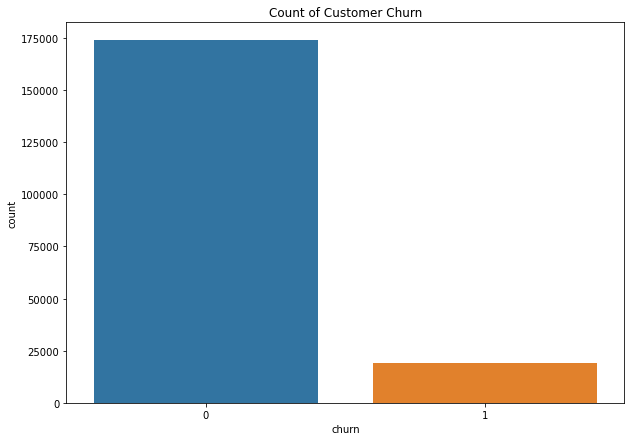

In [36]:
plt.figure(figsize=(10,7))
sns.countplot(customer_df["churn"])
plt.title("Count of Customer Churn")

Text(0, 0.5, 'Count')

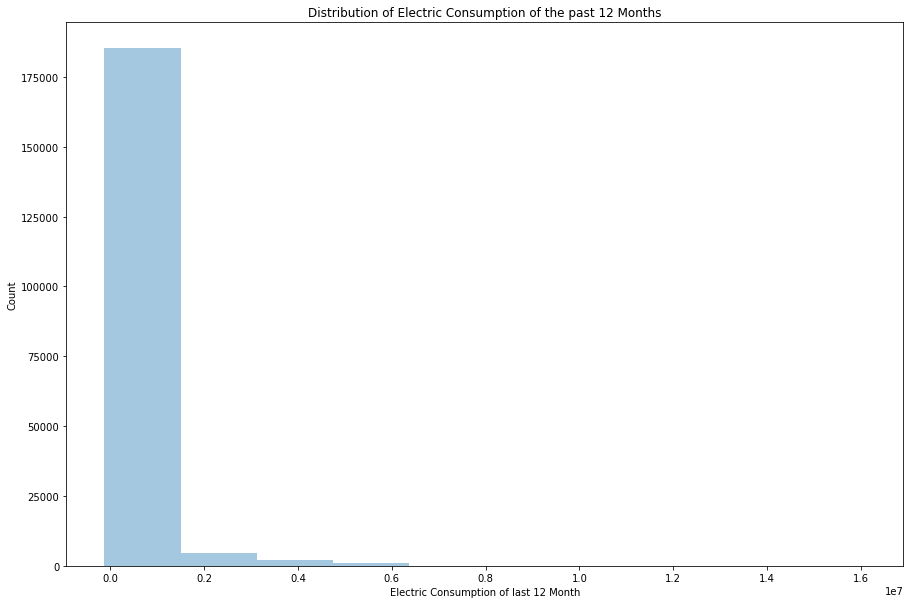

In [61]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["cons_12m"], bins=10, hist=True , kde=False)
plt.title("Distribution of Electric Consumption of the past 12 Months")
plt.xlabel("Electric Consumption of last 12 Month")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

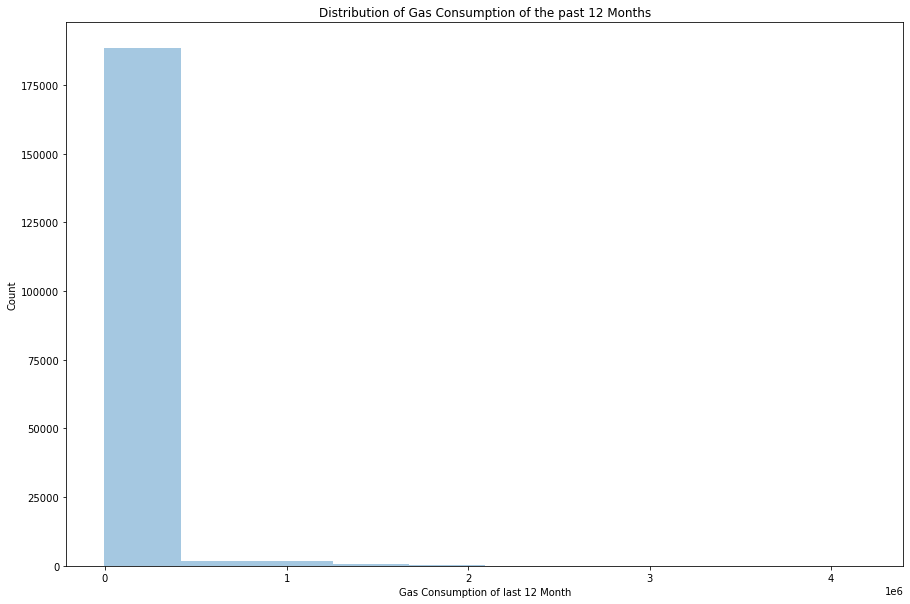

In [60]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["cons_gas_12m"], bins=10, hist=True , kde=False)
plt.title("Distribution of Gas Consumption of the past 12 Months")
plt.xlabel("Gas Consumption of last 12 Month")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

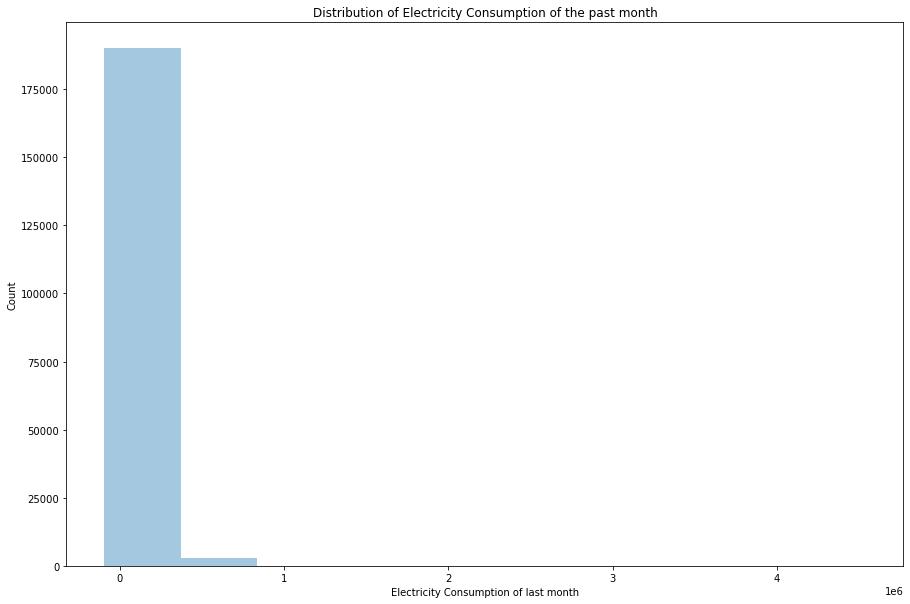

In [62]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["cons_last_month"], bins=10, hist=True , kde=False)
plt.title("Distribution of Electricity Consumption of the past month")
plt.xlabel("Electricity Consumption of last month")
plt.ylabel("Count")

In [68]:
print("Minimum forecasted electricity bill baseline for next month :", customer_df["forecast_base_bill_ele"].min())
print()
print("Average forecasted electricity bill baseline for next month :", customer_df["forecast_base_bill_ele"].mean())
print()
print("Maximum forecasted electricity bill baseline for next month :", customer_df["forecast_base_bill_ele"].max())

Minimum forecasted electricity bill baseline for next month : -364.94

Average forecasted electricity bill baseline for next month : 335.80748346986366

Maximum forecasted electricity bill baseline for next month : 12566.08


Text(0, 0.5, 'Count')

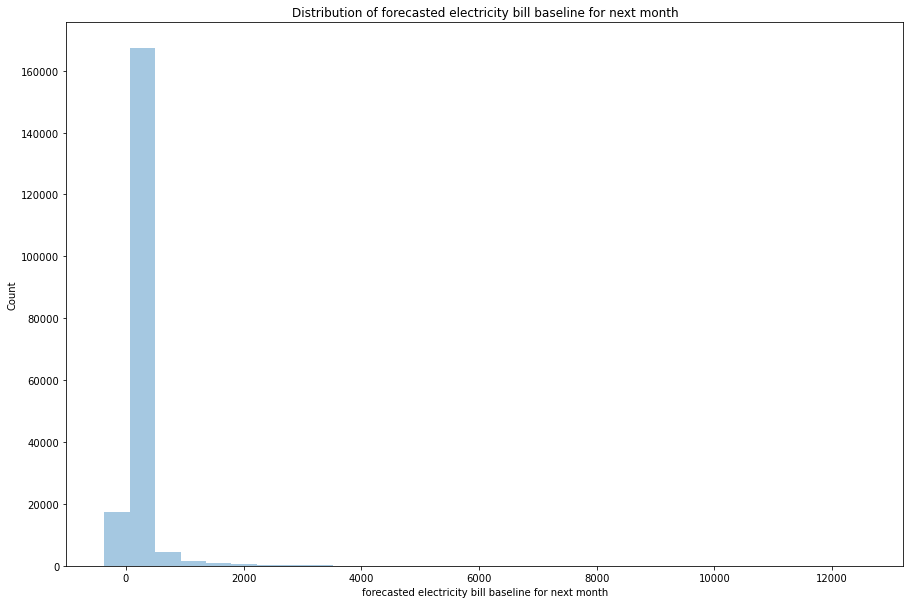

In [97]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["forecast_base_bill_ele"], bins=30,hist=True , kde=False)
plt.title("Distribution of forecasted electricity bill baseline for next month")
plt.xlabel("forecasted electricity bill baseline for next month")
plt.ylabel("Count")

In [70]:
print("Minimum forecasted electricity bill baseline for calendar year :", customer_df["forecast_base_bill_year"].min())
print()
print("Average forecasted electricity bill baseline for calendar year :", customer_df["forecast_base_bill_year"].mean())
print()
print("Maximum forecasted electricity bill baseline for calendar year :", customer_df["forecast_base_bill_year"].max())

Minimum forecasted electricity bill baseline for calendar year : -364.94

Average forecasted electricity bill baseline for calendar year : 335.80748346986366

Maximum forecasted electricity bill baseline for calendar year : 12566.08


Text(0, 0.5, 'Count')

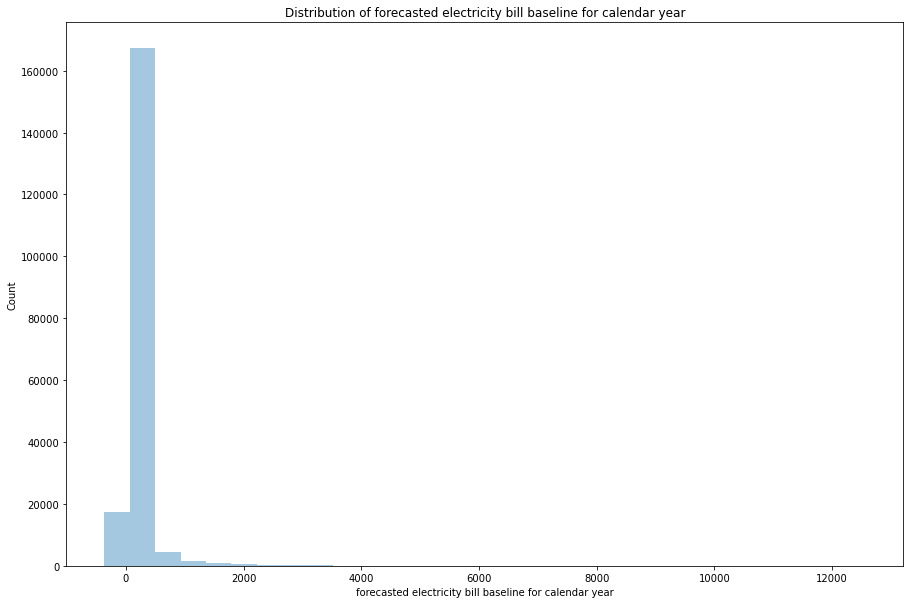

In [96]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["forecast_base_bill_year"], bins=30,hist=True , kde=False)
plt.title("Distribution of forecasted electricity bill baseline for calendar year")
plt.xlabel("forecasted electricity bill baseline for calendar year")
plt.ylabel("Count")

In [71]:
print("Minimum forecasted electricity bill baseline for 12 months :", customer_df["forecast_bill_12m"].min())
print()
print("Average forecasted electricity bill baseline for 12 months :", customer_df["forecast_bill_12m"].mean())
print()
print("Maximum forecasted electricity bill baseline for 12 months :", customer_df["forecast_bill_12m"].max())

Minimum forecasted electricity bill baseline for 12 months : -2503.48

Average forecasted electricity bill baseline for 12 months : 3835.596518276286

Maximum forecasted electricity bill baseline for 12 months : 81122.63


Text(0, 0.5, 'Count')

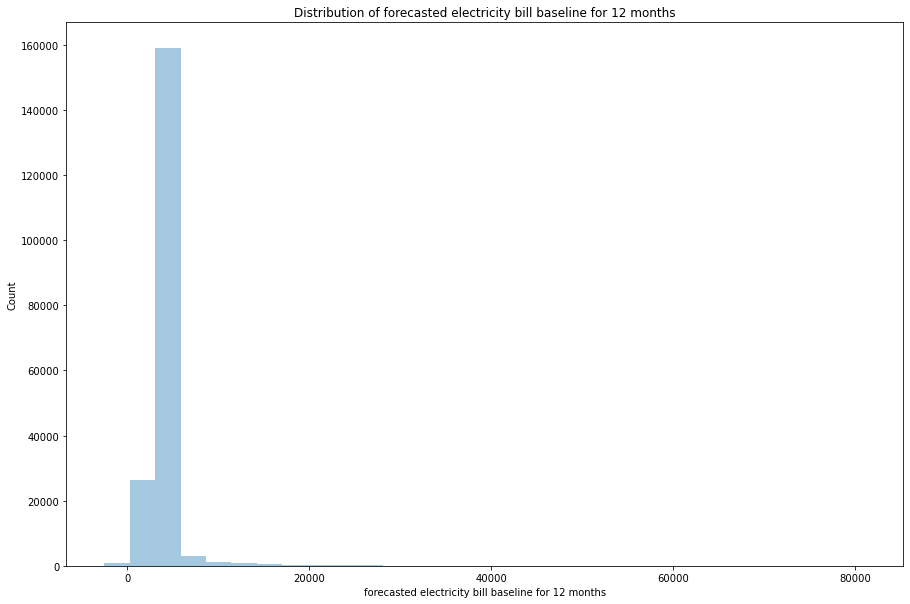

In [95]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["forecast_bill_12m"], bins=30,hist=True , kde=False)
plt.title("Distribution of forecasted electricity bill baseline for 12 months")
plt.xlabel("forecasted electricity bill baseline for 12 months")
plt.ylabel("Count")

In [72]:
print("Minimum forecasted electricity consumption for next month :", customer_df["forecast_cons"].min())
print()
print("Average forecasted electricity consumption for next month :", customer_df["forecast_cons"].mean())
print()
print("Maximum forecasted electricity consumption for next month :", customer_df["forecast_cons"].max())

Minimum forecasted electricity consumption for next month : 0.0

Average forecasted electricity consumption for next month : 206.80060534689727

Maximum forecasted electricity consumption for next month : 9682.89


Text(0, 0.5, 'Count')

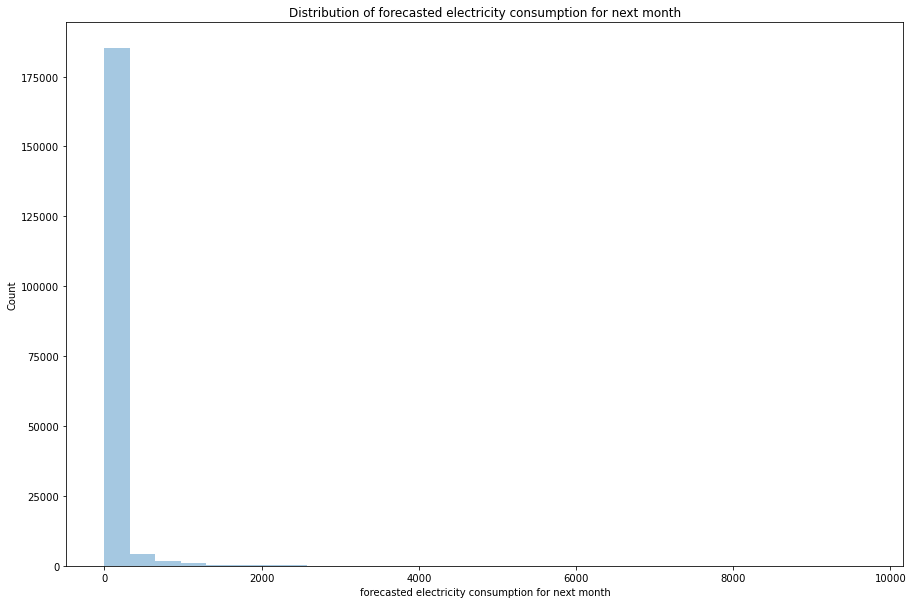

In [94]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["forecast_cons"], bins=30,hist=True , kde=False)
plt.title("Distribution of forecasted electricity consumption for next month")
plt.xlabel("forecasted electricity consumption for next month")
plt.ylabel("Count")

In [81]:
print("Minimum forecasted electricity consumption for next 12 months :", customer_df["forecast_cons_12m"].min())
print()
print("Average forecasted electricity consumption for next 12 months :", customer_df["forecast_cons_12m"].mean())
print()
print("Maximum forecasted electricity consumption for next 12 months :", customer_df["forecast_cons_12m"].max())

Minimum forecasted electricity consumption for next 12 months : -16689.26

Average forecasted electricity consumption for next 12 months : 2370.2736760239604

Maximum forecasted electricity consumption for next 12 months : 103801.93


Text(0, 0.5, 'Count')

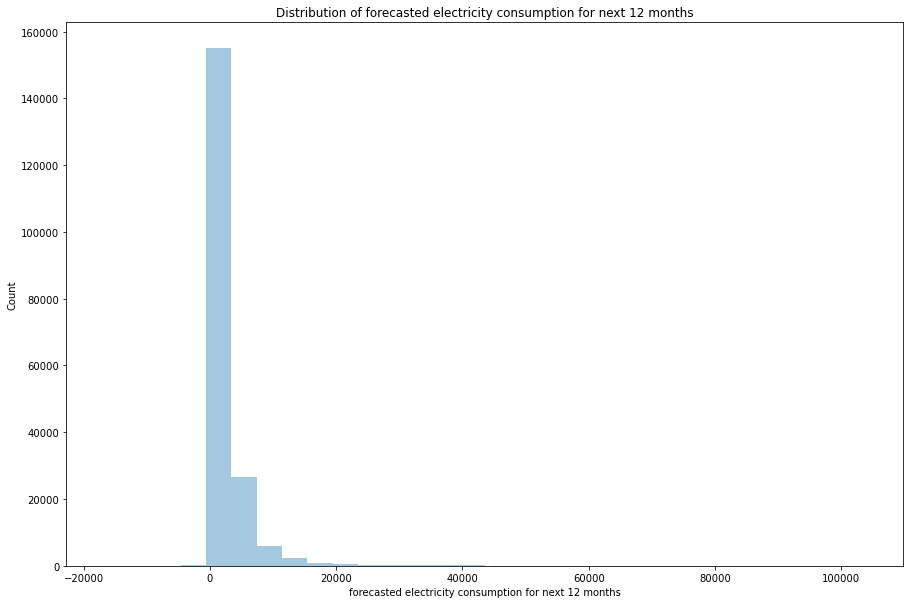

In [93]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["forecast_cons_12m"], bins=30,hist=True , kde=False)
plt.title("Distribution of forecasted electricity consumption for next 12 months")
plt.xlabel("forecasted electricity consumption for next 12 months")
plt.ylabel("Count")

In [83]:
print("Minimum forecasted electricity consumption for next calendar year :", customer_df["forecast_cons_year"].min())
print()
print("Average forecasted electricity consumption for next calendar year :", customer_df["forecast_cons_year"].mean())
print()
print("Maximum forecasted electricity consumption for next calendar year :", customer_df["forecast_cons_year"].max())

Minimum forecasted electricity consumption for next calendar year : -85627

Average forecasted electricity consumption for next calendar year : 1907.6528067066663

Maximum forecasted electricity consumption for next calendar year : 175375


Text(0, 0.5, 'Count')

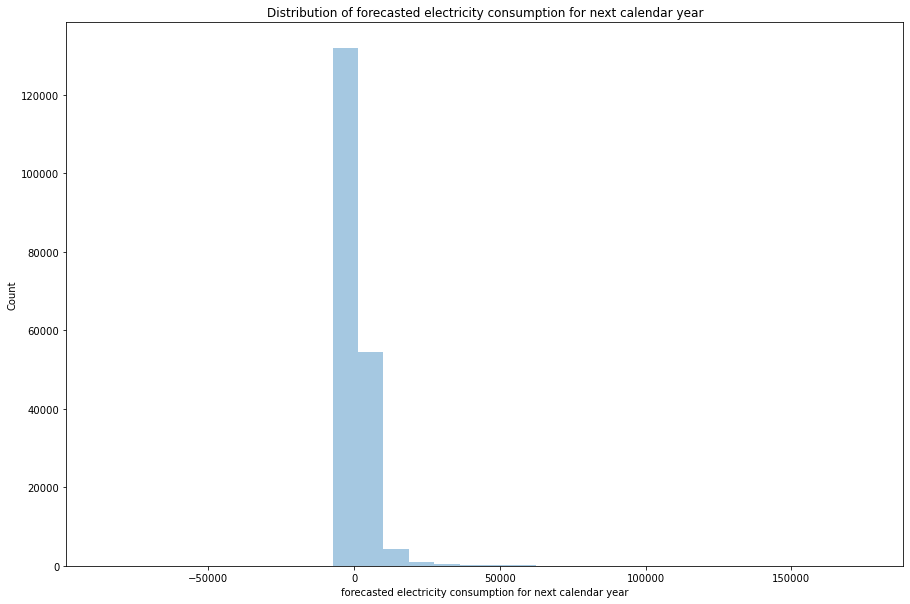

In [92]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["forecast_cons_year"], bins=30,hist=True , kde=False)
plt.title("Distribution of forecasted electricity consumption for next calendar year")
plt.xlabel("forecasted electricity consumption for next calendar year")
plt.ylabel("Count")

In [89]:
print("Minimum forecasted value of current discount :", customer_df["forecast_discount_energy"].min())
print()
print("Average forecasted value of current discount :", customer_df["forecast_discount_energy"].mean())
print()
print("Maximum forecasted value of current discount :", customer_df["forecast_discount_energy"].max())

Minimum forecasted value of current discount : 0.0

Average forecasted value of current discount : 0.9919527925011055

Maximum forecasted value of current discount : 50.0


Text(0, 0.5, 'Count')

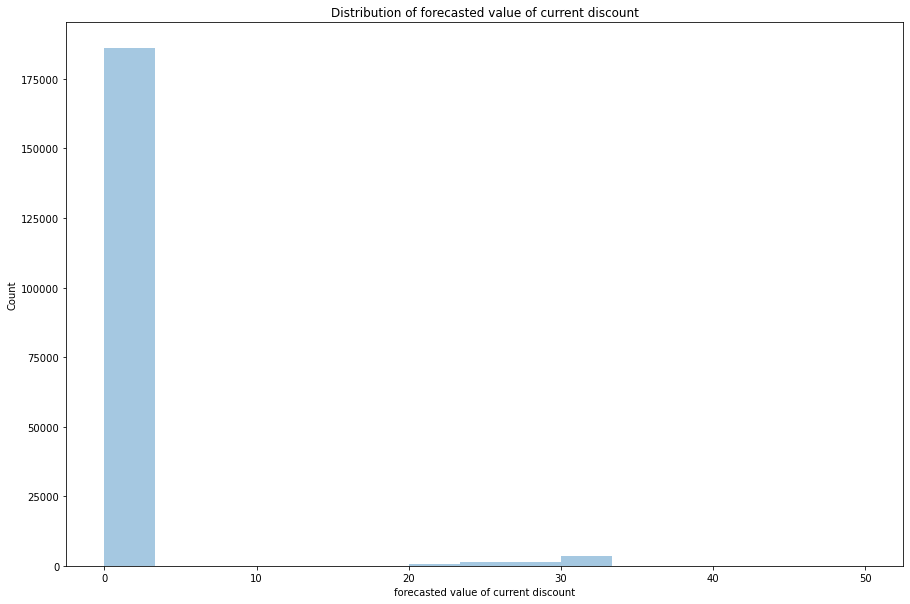

In [91]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["forecast_discount_energy"], bins=15, hist=True , kde=False)
plt.title("Distribution of forecasted value of current discount")
plt.xlabel("forecasted value of current discount")
plt.ylabel("Count")

In [98]:
print("Minimum forecasted bill of meter rental for the next 12 months :", customer_df["forecast_meter_rent_12m"].min())
print()
print("Average forecasted bill of meter rental for the next 12 months :", customer_df["forecast_meter_rent_12m"].mean())
print()
print("Maximum forecasted bill of meter rental for the next 12 months :", customer_df["forecast_meter_rent_12m"].max())

Minimum forecasted bill of meter rental for the next 12 months : -242.96

Average forecasted bill of meter rental for the next 12 months : 70.2977661371335

Maximum forecasted bill of meter rental for the next 12 months : 2411.69


Text(0, 0.5, 'Count')

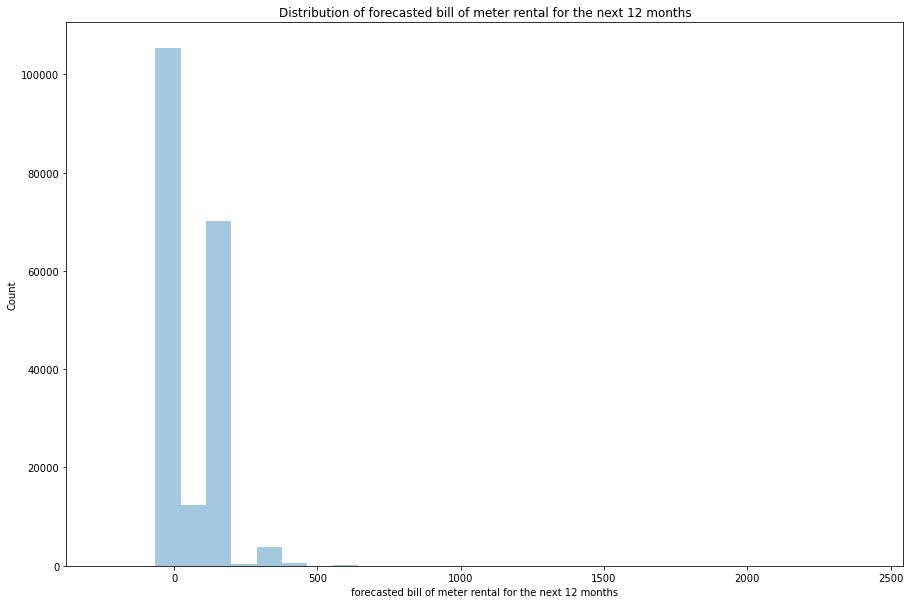

In [99]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["forecast_meter_rent_12m"], bins=30,hist=True , kde=False)
plt.title("Distribution of forecasted bill of meter rental for the next 12 months")
plt.xlabel("forecasted bill of meter rental for the next 12 months")
plt.ylabel("Count")

In [111]:
print("Minimum forecasted energy price for 1st period :", customer_df["forecast_price_energy_p1"].min())
print()
print("Average forecasted energy price for 1st period :", customer_df["forecast_price_energy_p1"].mean())
print()
print("Maximum forecasted energy price for 1st period :", customer_df["forecast_price_energy_p1"].max())

Minimum forecasted energy price for 1st period : 0.0

Average forecasted energy price for 1st period : 0.1359060469077896

Maximum forecasted energy price for 1st period : 0.273963


Text(0, 0.5, 'Count')

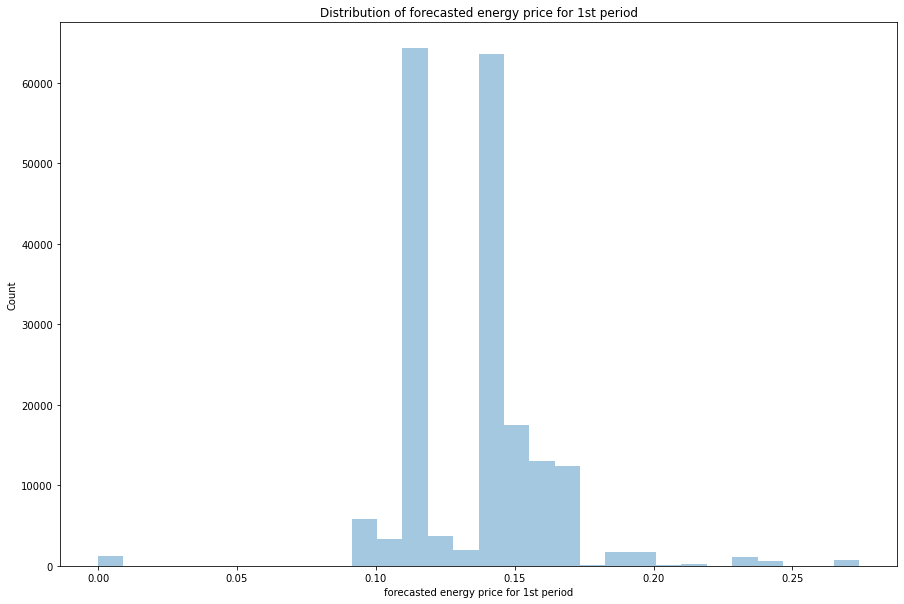

In [112]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["forecast_price_energy_p1"], bins=30,hist=True , kde=False)
plt.title("Distribution of forecasted energy price for 1st period")
plt.xlabel("forecasted energy price for 1st period")
plt.ylabel("Count")

In [114]:
print("Minimum forecasted energy price for 2nd period :", customer_df["forecast_price_energy_p2"].min())
print()
print("Average forecasted energy price for 2nd period :", customer_df["forecast_price_energy_p2"].mean())
print()
print("Maximum forecasted energy price for 2nd periods :", customer_df["forecast_price_energy_p2"].max())

Minimum forecasted energy price for 2nd period : 0.0

Average forecasted energy price for 2nd period : 0.05294472604611256

Maximum forecasted energy price for 2nd periods : 0.195975


Text(0, 0.5, 'Count')

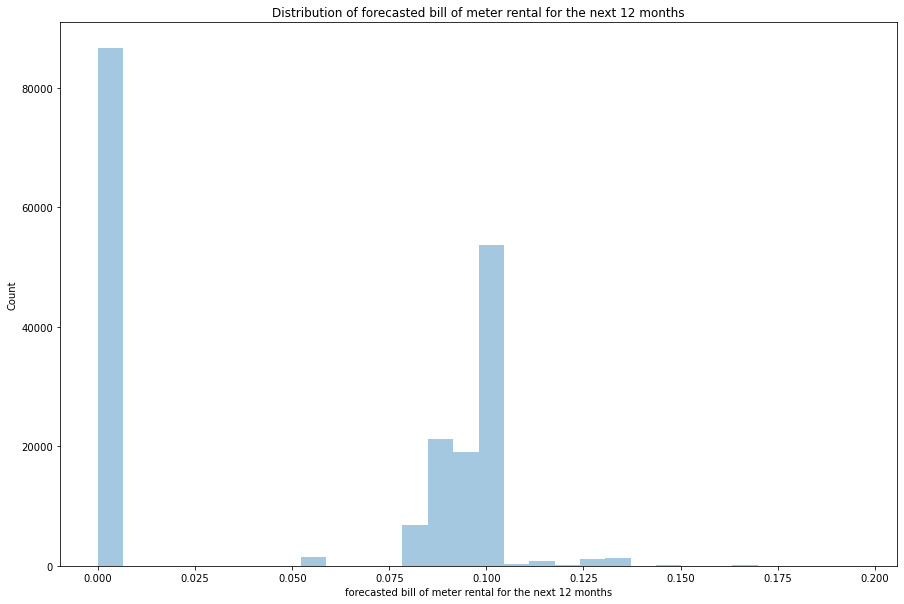

In [115]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["forecast_price_energy_p2"], bins=30,hist=True , kde=False)
plt.title("Distribution of forecasted bill of meter rental for the next 12 months")
plt.xlabel("forecasted bill of meter rental for the next 12 months")
plt.ylabel("Count")

In [116]:
print("Minimum forecasted power price for 1st period :", customer_df["forecast_price_pow_p1"].min())
print()
print("Average forecasted power price for 1st period :", customer_df["forecast_price_pow_p1"].mean())
print()
print("Maximum forecasted power price for 1st period :", customer_df["forecast_price_pow_p1"].max())

Minimum forecasted power price for 1st period : -0.122184

Average forecasted power price for 1st period : 43.533283436177825

Maximum forecasted power price for 1st period : 59.44470996


Text(0, 0.5, 'Count')

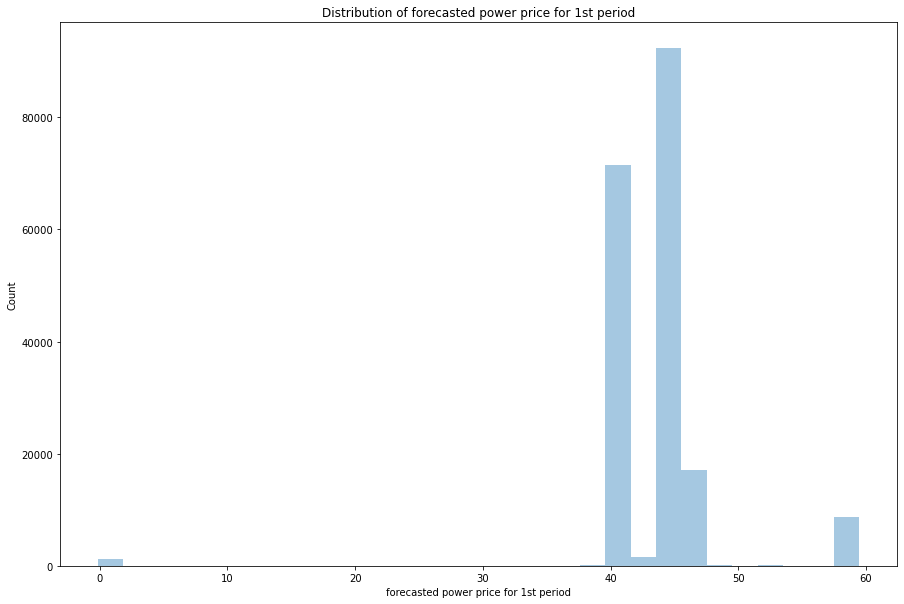

In [117]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["forecast_price_pow_p1"], bins=30,hist=True , kde=False)
plt.title("Distribution of forecasted power price for 1st period")
plt.xlabel("forecasted power price for 1st period")
plt.ylabel("Count")

Text(0, 0.5, 'Count of Customers')

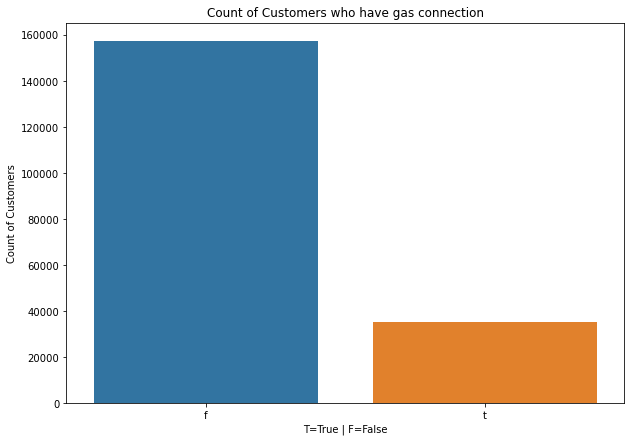

In [118]:
plt.figure(figsize=(10,7))
sns.countplot(customer_df["has_gas"])
plt.title("Count of Customers who have gas connection")
plt.xlabel("T=True | F=False")
plt.ylabel("Count of Customers")

In [119]:
print("Minimum current paid consumption :", customer_df["imp_cons"].min())
print()
print("Average current paid consumption :", customer_df["imp_cons"].mean())
print()
print("Maximum current paid consumption :", customer_df["imp_cons"].max())

Minimum current paid consumption : -9038.21

Average current paid consumption : 196.15037201688097

Maximum current paid consumption : 15042.79


Text(0, 0.5, 'Count')

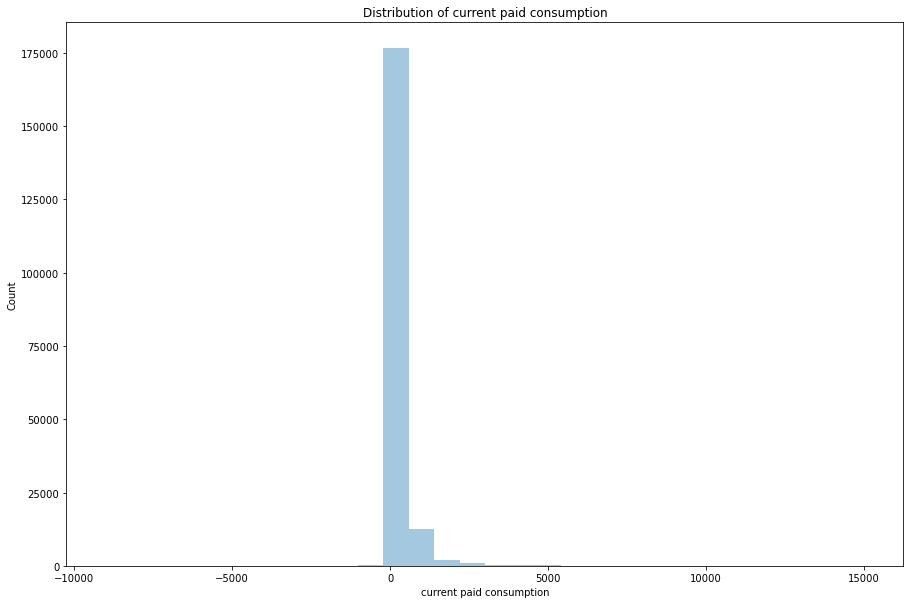

In [120]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["imp_cons"], bins=30,hist=True , kde=False)
plt.title("Distribution of current paid consumption")
plt.xlabel("current paid consumption")
plt.ylabel("Count")

In [121]:
print("Minimum gross margin on power subscription :", customer_df["margin_gross_pow_ele"].min())
print("Minimum net margin on power subscription :", customer_df["margin_net_pow_ele"].min())
print()
print("Average gross margin on power subscription :", customer_df["margin_gross_pow_ele"].mean())
print("Average net margin on power subscription :", customer_df["margin_net_pow_ele"].mean())
print()
print("Maximum gross margin on power subscription :", customer_df["margin_gross_pow_ele"].max())
print("Maximum net margin on power subscription :", customer_df["margin_net_pow_ele"].max())

Minimum gross margin on power subscription : -525.54
Minimum net margin on power subscription : -615.66

Average gross margin on power subscription : 22.46403244039401
Average net margin on power subscription : 21.46343009448052

Maximum gross margin on power subscription : 374.64
Maximum net margin on power subscription : 374.64


Text(0, 0.5, 'Count')

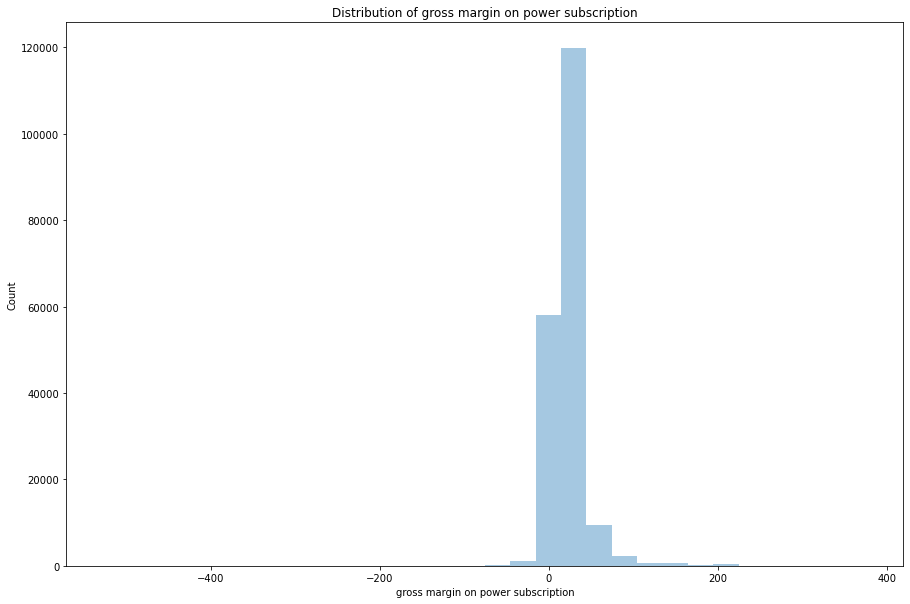

In [122]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["margin_gross_pow_ele"], bins=30,hist=True , kde=False)
plt.title("Distribution of gross margin on power subscription")
plt.xlabel("gross margin on power subscription")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

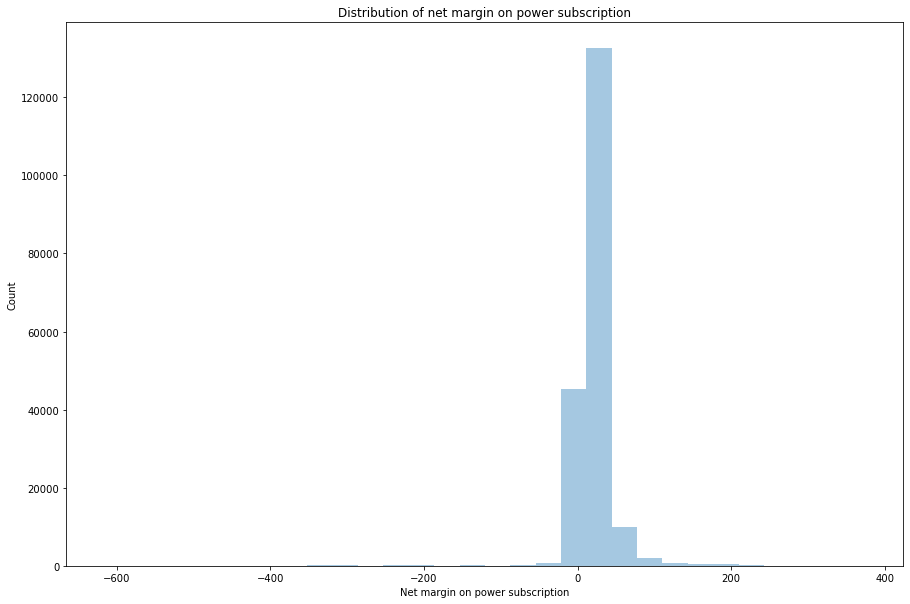

In [123]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["margin_net_pow_ele"], bins=30,hist=True , kde=False)
plt.title("Distribution of net margin on power subscription")
plt.xlabel("Net margin on power subscription")
plt.ylabel("Count")

In [127]:
print("Couint of active products and services :")
print(customer_df["nb_prod_act"].value_counts())

Couint of active products and services :
1     150611
2      32460
3       6731
4       2036
5        444
32       300
9        144
6        108
8         96
31        48
10        24
Name: nb_prod_act, dtype: int64


Text(0, 0.5, 'Count')

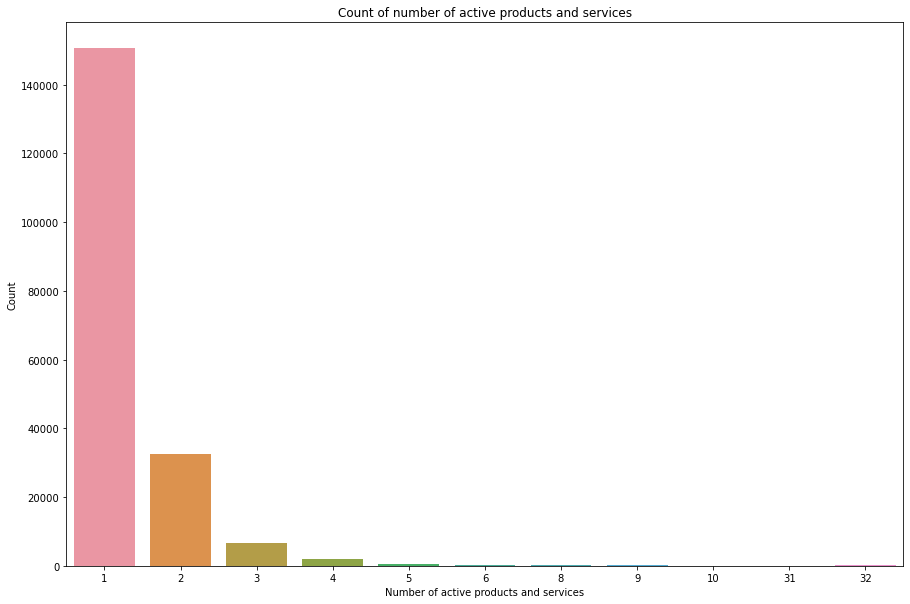

In [134]:
plt.figure(figsize=(15,10))
sns.countplot(customer_df["nb_prod_act"])
plt.title("Count of number of active products and services")
plt.xlabel("Number of active products and services")
plt.ylabel("Count")

In [128]:
print("Minimum total net margin :", customer_df["net_margin"].min())
print()
print("Average total net margin :", customer_df["net_margin"].mean())
print()
print("Maximum total net margin :", customer_df["net_margin"].max())

Minimum total net margin : -4148.99

Average total net margin : 217.96542381056165

Maximum total net margin : 24570.65


Text(0, 0.5, 'Count')

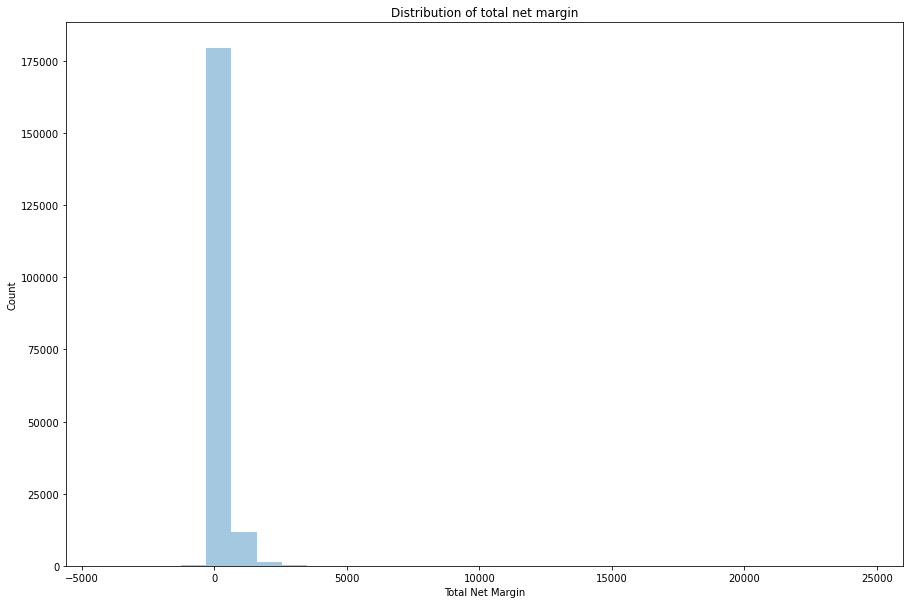

In [129]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["net_margin"], bins=30,hist=True , kde=False)
plt.title("Distribution of total net margin")
plt.xlabel("Total Net Margin")
plt.ylabel("Count")

In [132]:
print("Couint of antiquity of the client (in number of years) :")
print(customer_df["num_years_antig"].value_counts())

Couint of antiquity of the client (in number of years) :
6     60624
4     51916
3     33042
5     29919
7      7773
11     2831
8      2422
12     1524
10     1355
9      1272
13      156
2       132
16       12
15       12
1        12
Name: num_years_antig, dtype: int64


Text(0, 0.5, 'Count')

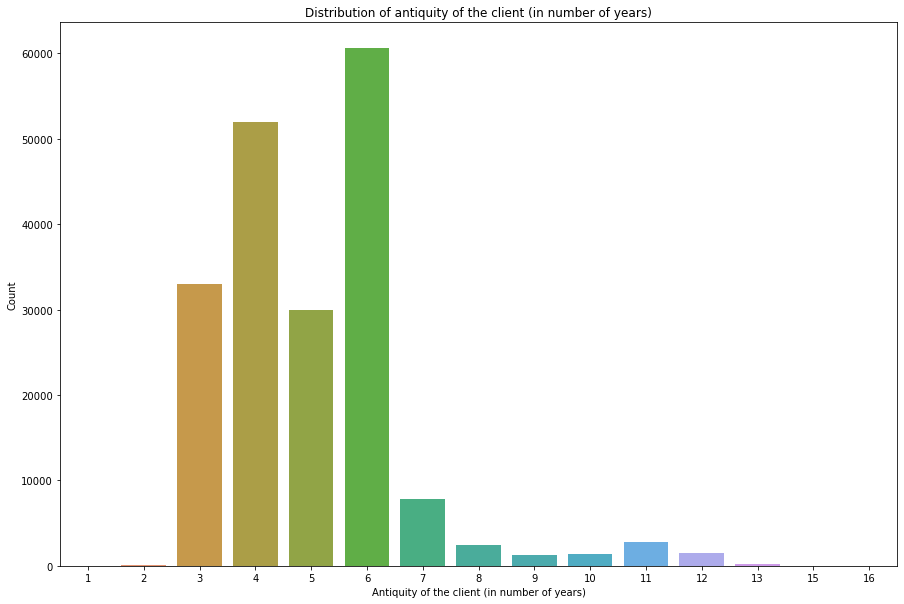

In [135]:
plt.figure(figsize=(15,10))
sns.countplot(customer_df["num_years_antig"])
plt.title("Distribution of antiquity of the client (in number of years)")
plt.xlabel("Antiquity of the client (in number of years)")
plt.ylabel("Count")

In [136]:
print("Minimum subscribed power :", customer_df["pow_max"].min())
print()
print("Average subscribed power :", customer_df["pow_max"].mean())
print()
print("Maximum subscribed power :", customer_df["pow_max"].max())

Minimum subscribed power : 1.0

Average subscribed power : 20.603920996458818

Maximum subscribed power : 500.0


Text(0, 0.5, 'Count')

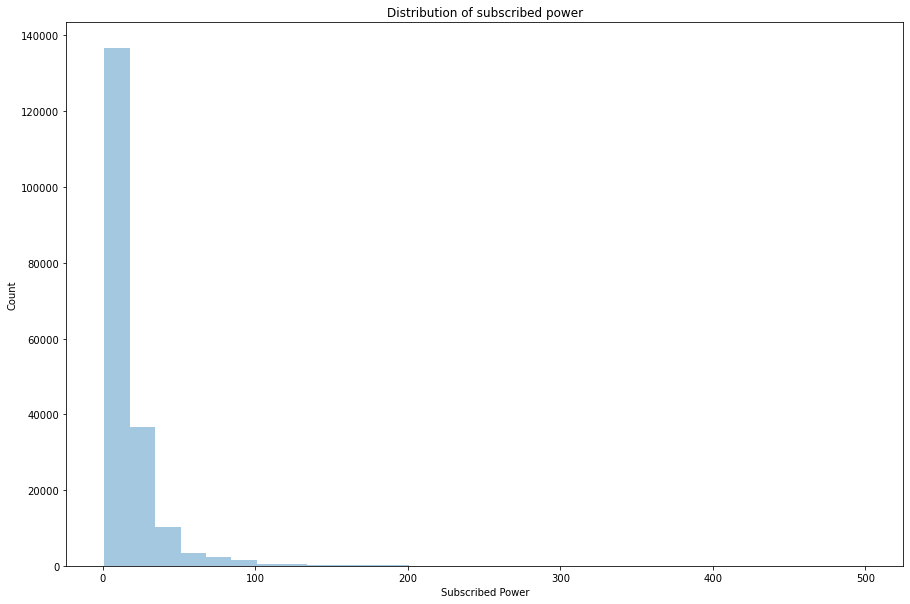

In [137]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["pow_max"], bins=30,hist=True , kde=False)
plt.title("Distribution of subscribed power")
plt.xlabel("Subscribed Power")
plt.ylabel("Count")

In [141]:
print("Minimum price of energy for the 1st period :", customer_df["price_p1_var"].min())
print("Minimum price of energy for the 2nd period :", customer_df["price_p2_var"].min())
print("Minimum price of energy for the 3rd period :", customer_df["price_p3_var"].min())
print()
print("Average price of energy for the 1st period :", customer_df["price_p1_var"].mean())
print("Average price of energy for the 2nd period :", customer_df["price_p2_var"].mean())
print("Minimum price of energy for the 3rd period :", customer_df["price_p3_var"].mean())
print()
print("Maximum price of energy for the 1st period :", customer_df["price_p1_var"].max())
print("Maximum price of energy for the 2nd period :", customer_df["price_p2_var"].max())
print("Minimum price of energy for the 3rd period :", customer_df["price_p3_var"].max())

Minimum price of energy for the 1st period : 0.0
Minimum price of energy for the 2nd period : 0.0
Minimum price of energy for the 3rd period : 0.0

Average price of energy for the 1st period : 0.14099147330077436
Average price of energy for the 2nd period : 0.05441161151332901
Minimum price of energy for the 3rd period : 0.03071226411395047

Maximum price of energy for the 1st period : 0.2807
Maximum price of energy for the 2nd period : 0.229788
Minimum price of energy for the 3rd period : 0.114102


In [142]:
print("Minimum price of power for the 1st period :", customer_df["price_p1_fix"].min())
print("Minimum price of power for the 2nd period :", customer_df["price_p2_fix"].min())
print("Minimum price of power for the 3rd period :", customer_df["price_p3_fix"].min())
print()
print("Average price of power for the 1st period :", customer_df["price_p1_fix"].mean())
print("Average price of power for the 2nd period :", customer_df["price_p2_fix"].mean())
print("Minimum price of power for the 3rd period :", customer_df["price_p3_fix"].mean())
print()
print("Maximum price of power for the 1st period :", customer_df["price_p1_fix"].max())
print("Maximum price of power for the 2nd period :", customer_df["price_p2_fix"].max())
print("Minimum price of power for the 3rd period :", customer_df["price_p3_fix"].max())

Minimum price of power for the 1st period : -0.1777788
Minimum price of power for the 2nd period : -0.097752
Minimum price of power for the 3rd period : -0.06517200000000001

Average price of power for the 1st period : 43.32554620082774
Average price of power for the 2nd period : 10.698200762762688
Minimum price of power for the 3rd period : 6.455436482525534

Maximum price of power for the 1st period : 59.44470996
Maximum price of power for the 2nd period : 36.490692
Minimum price of power for the 3rd period : 17.45822136


Text(0, 0.5, 'Count')

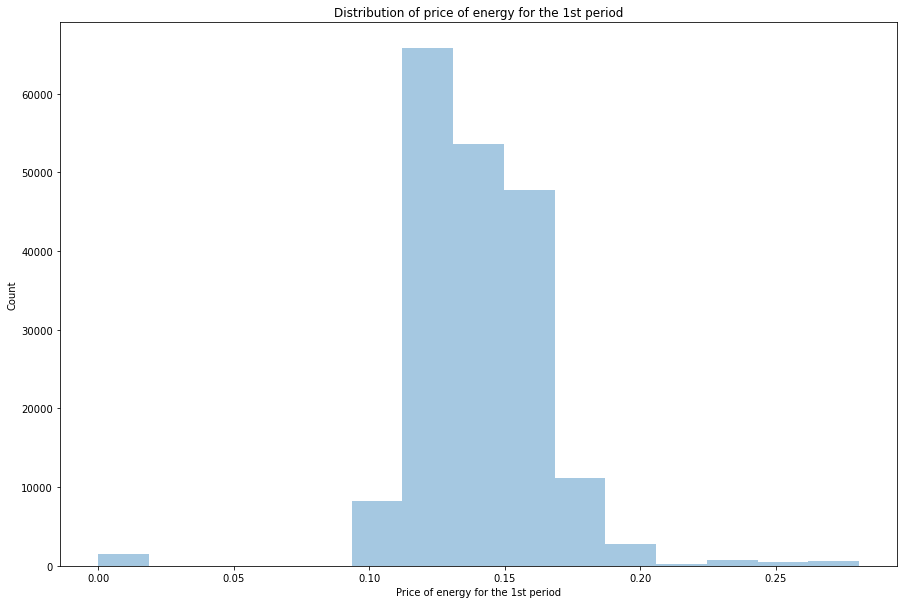

In [144]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["price_p1_var"], bins=15,hist=True , kde=False)
plt.title("Distribution of price of energy for the 1st period")
plt.xlabel("Price of energy for the 1st period")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

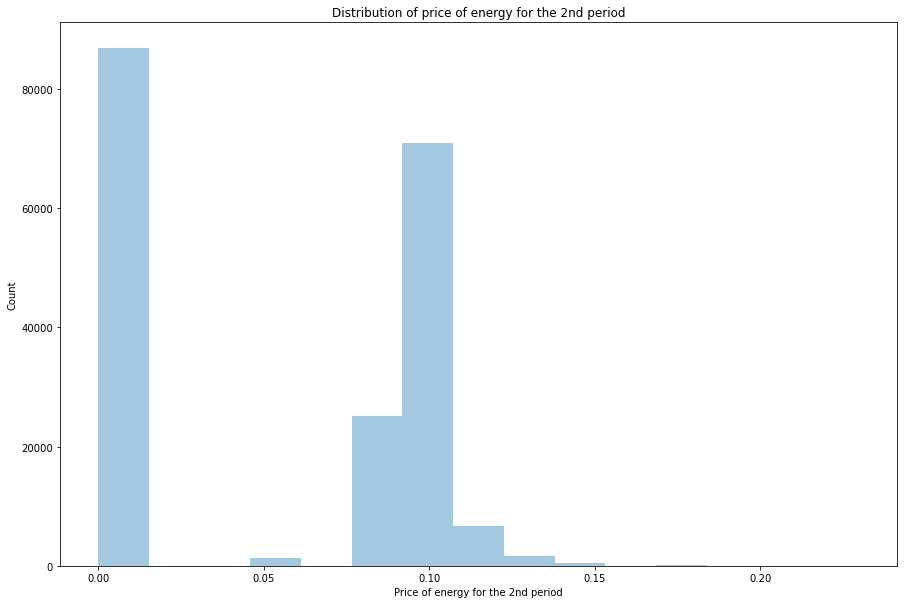

In [145]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["price_p2_var"], bins=15,hist=True , kde=False)
plt.title("Distribution of price of energy for the 2nd period")
plt.xlabel("Price of energy for the 2nd period")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

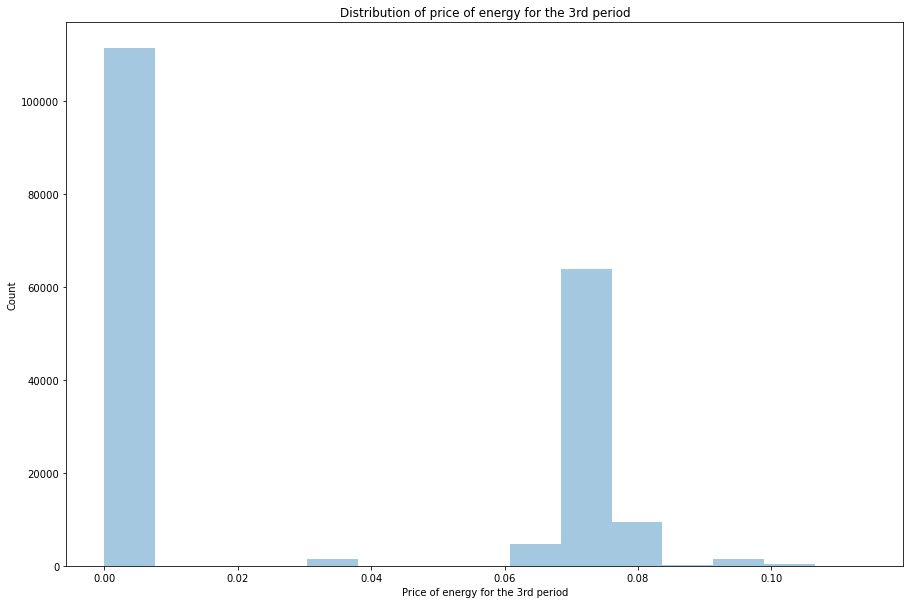

In [146]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["price_p3_var"], bins=15,hist=True , kde=False)
plt.title("Distribution of price of energy for the 3rd period")
plt.xlabel("Price of energy for the 3rd period")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

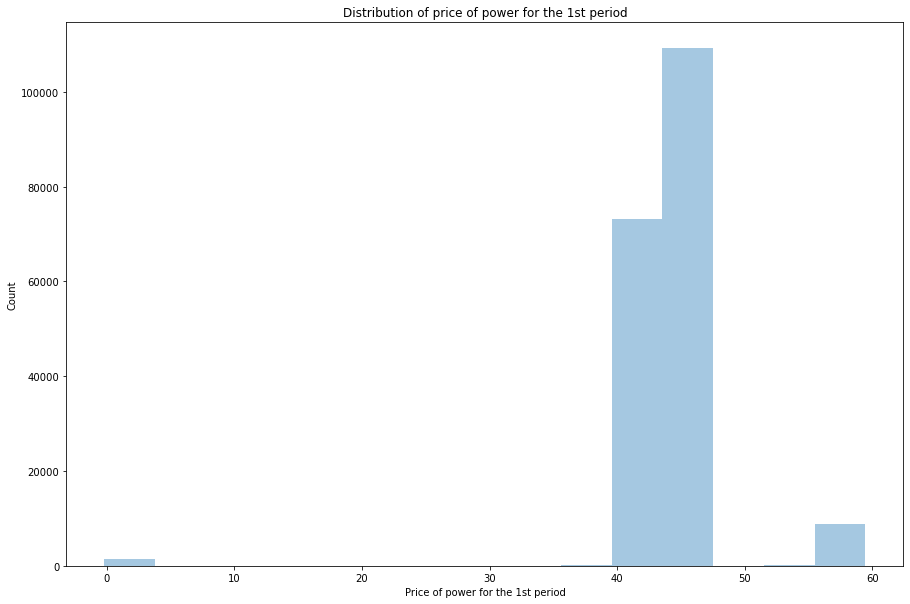

In [147]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["price_p1_fix"], bins=15,hist=True , kde=False)
plt.title("Distribution of price of power for the 1st period")
plt.xlabel("Price of power for the 1st period")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

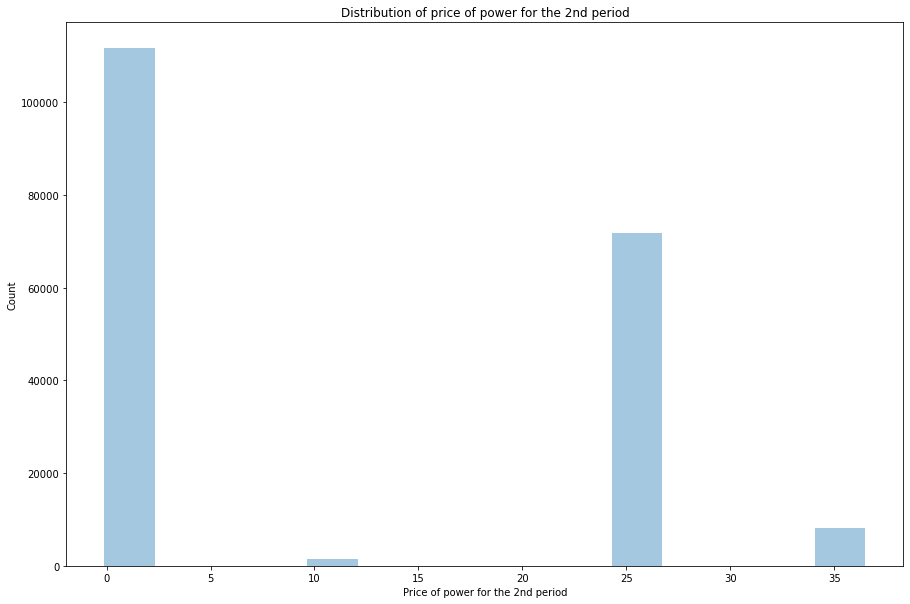

In [148]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["price_p2_fix"], bins=15,hist=True , kde=False)
plt.title("Distribution of price of power for the 2nd period")
plt.xlabel("Price of power for the 2nd period")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

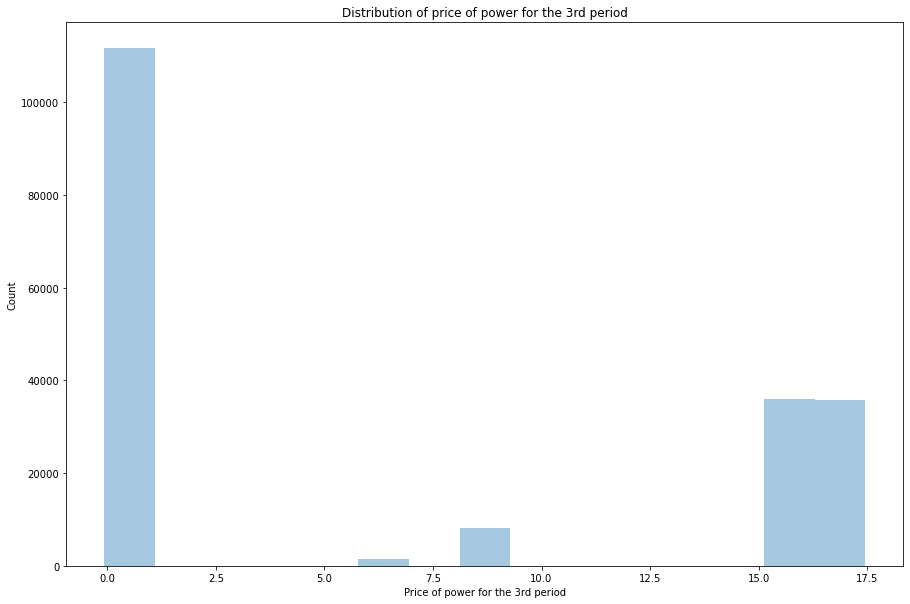

In [149]:
plt.figure(figsize=(15,10))
sns.distplot(customer_df["price_p3_fix"], bins=15,hist=True , kde=False)
plt.title("Distribution of price of power for the 3rd period")
plt.xlabel("Price of power for the 3rd period")
plt.ylabel("Count")

In [150]:
customer_df.columns

Index(['id', 'price_date', 'price_p1_var', 'price_p2_var', 'price_p3_var',
       'price_p1_fix', 'price_p2_fix', 'price_p3_fix', 'activity_new',
       'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_first_activ', 'date_modif_prod',
       'date_renewal', 'forecast_base_bill_ele', 'forecast_base_bill_year',
       'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

Text(0, 0.5, 'Electricity consumption for next month')

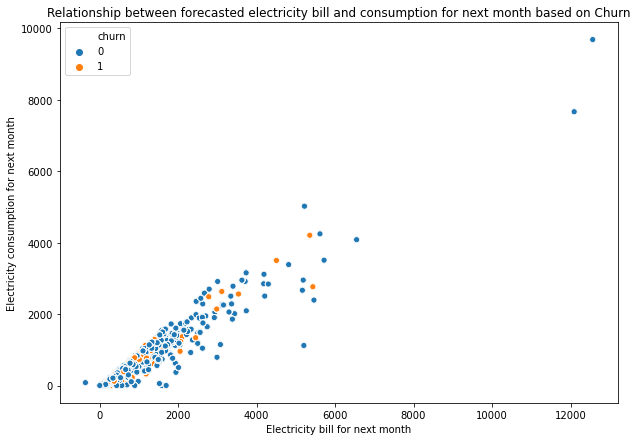

In [155]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=customer_df, x='forecast_base_bill_ele', y='forecast_cons', hue="churn")
plt.title("Relationship between forecasted electricity bill and consumption for next month based on Churn")
plt.xlabel("Electricity bill for next month")
plt.ylabel("Electricity consumption for next month")

Text(0, 0.5, 'Electricity consumption for next calendar year')

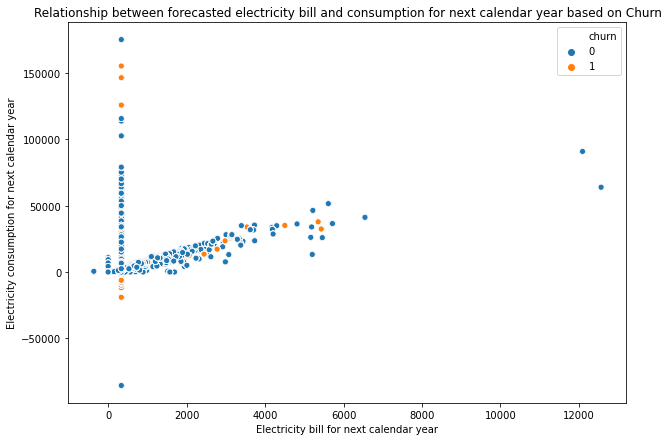

In [171]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=customer_df, x='forecast_base_bill_year', y='forecast_cons_year', hue="churn")
plt.title("Relationship between forecasted electricity bill and consumption for next calendar year based on Churn")
plt.xlabel("Electricity bill for next calendar year")
plt.ylabel("Electricity consumption for next calendar year")

Text(0, 0.5, 'Electricity consumption for next 12 months')

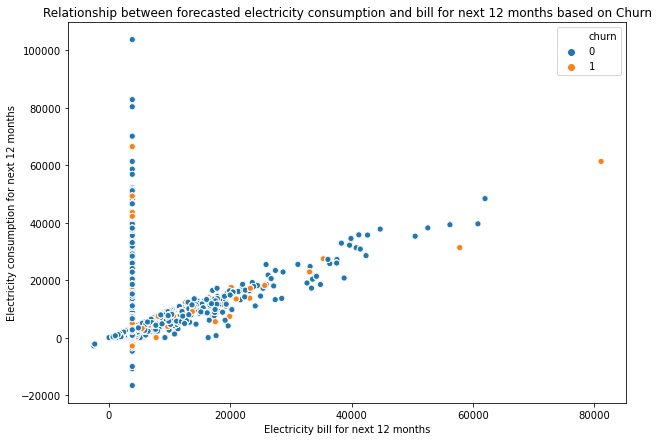

In [172]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=customer_df, x='forecast_bill_12m', y='forecast_cons_12m', hue="churn")
plt.title("Relationship between forecasted electricity consumption and bill for next 12 months based on Churn")
plt.xlabel("Electricity bill for next 12 months")
plt.ylabel("Electricity consumption for next 12 months")

Text(0, 0.5, 'Gross Margin')

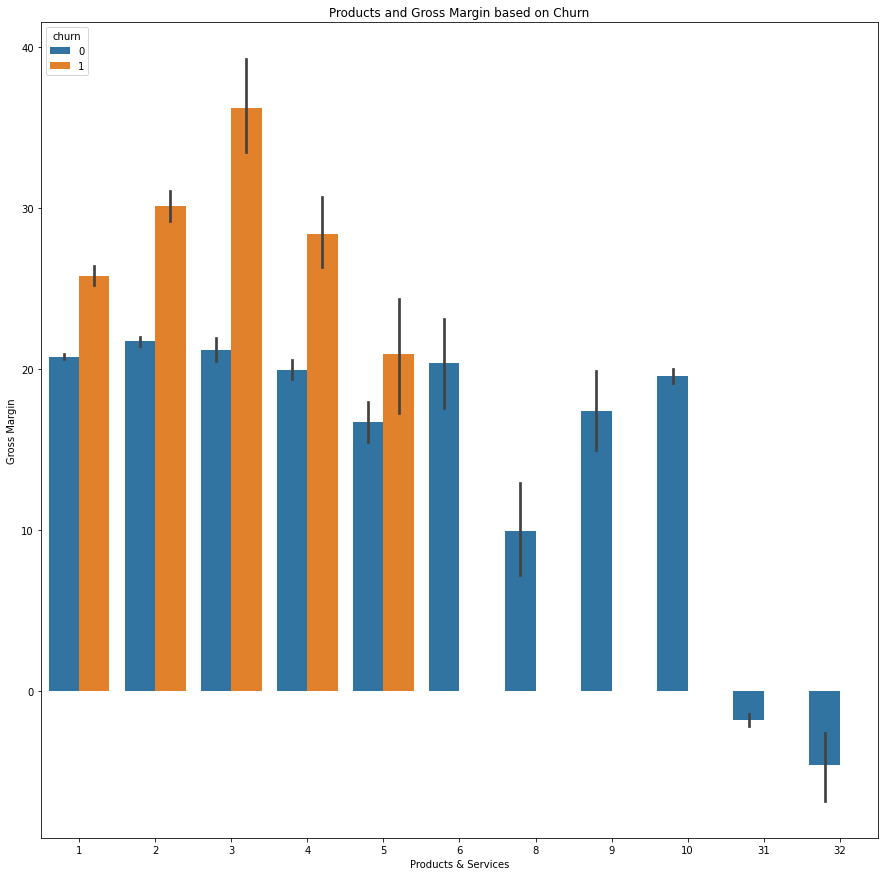

In [177]:
plt.figure(figsize=(15,15))
sns.barplot(data=customer_df, x='nb_prod_act', y='margin_net_pow_ele' , hue="churn")
plt.title("Products and Gross Margin based on Churn")
plt.xlabel("Products & Services")
plt.ylabel("Gross Margin")

Text(0, 0.5, 'Net Margin')

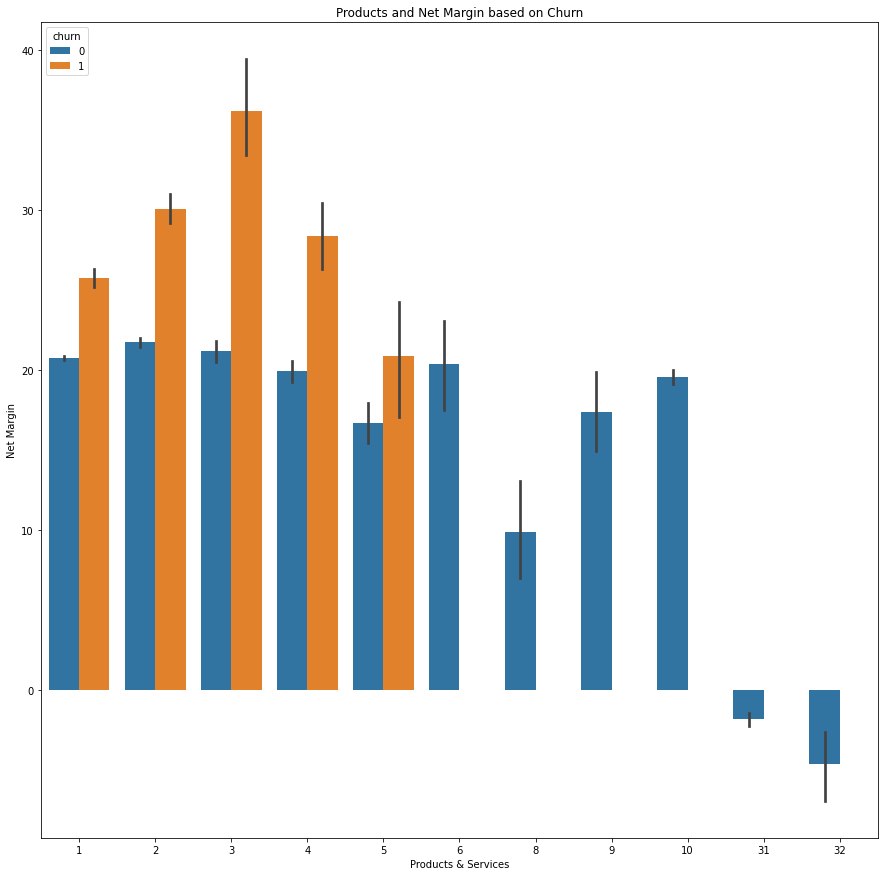

In [179]:
plt.figure(figsize=(15,15))
sns.barplot(data=customer_df, x='nb_prod_act', y='margin_net_pow_ele' , hue="churn")
plt.title("Products and Net Margin based on Churn")
plt.xlabel("Products & Services")
plt.ylabel("Net Margin")

Text(0, 0.5, 'Total Net Margin')

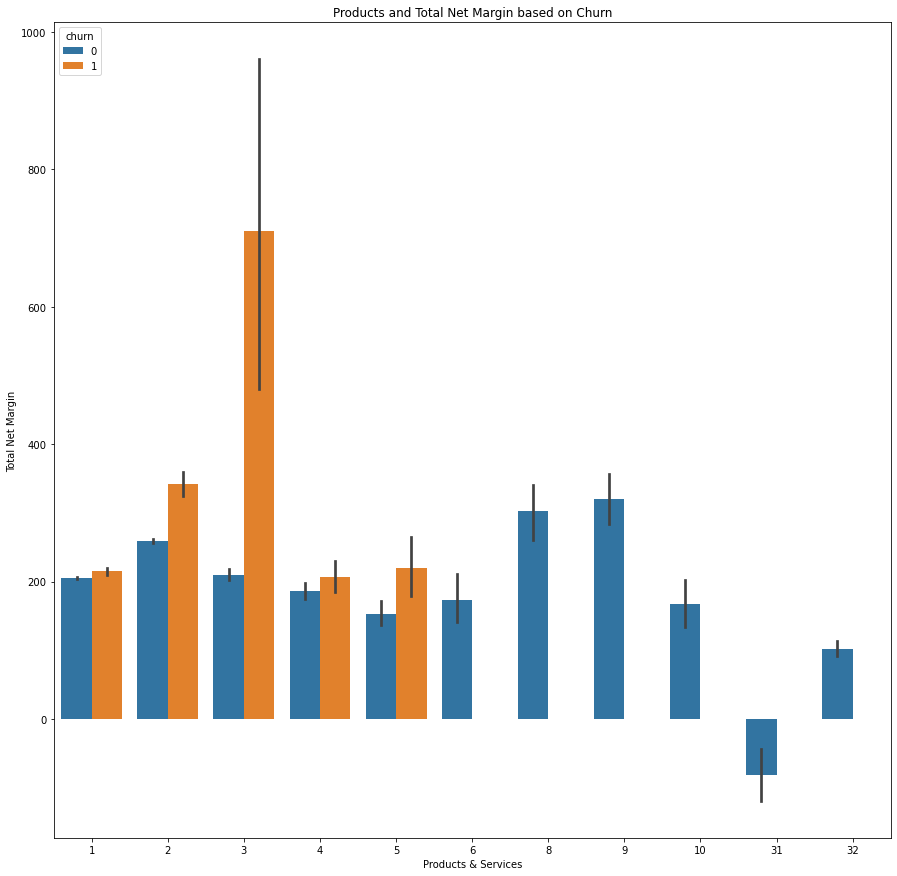

In [180]:
plt.figure(figsize=(15,15))
sns.barplot(data=customer_df, x='nb_prod_act', y='net_margin' , hue="churn")
plt.title("Products and Total Net Margin based on Churn")
plt.xlabel("Products & Services")
plt.ylabel("Total Net Margin")

Text(0, 0.5, 'Gross Margin')

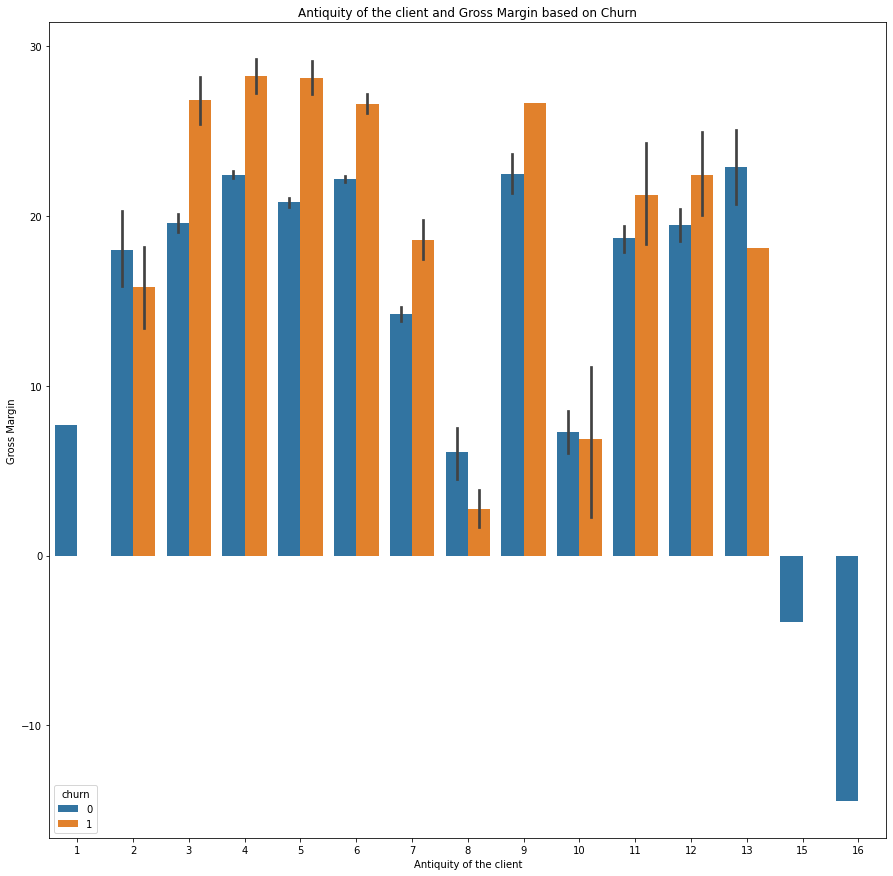

In [182]:
plt.figure(figsize=(15,15))
sns.barplot(data=customer_df, x='num_years_antig', y='margin_net_pow_ele' , hue="churn")
plt.title("Antiquity of the client and Gross Margin based on Churn")
plt.xlabel("Antiquity of the client")
plt.ylabel("Gross Margin")

Text(0, 0.5, 'Net Margin')

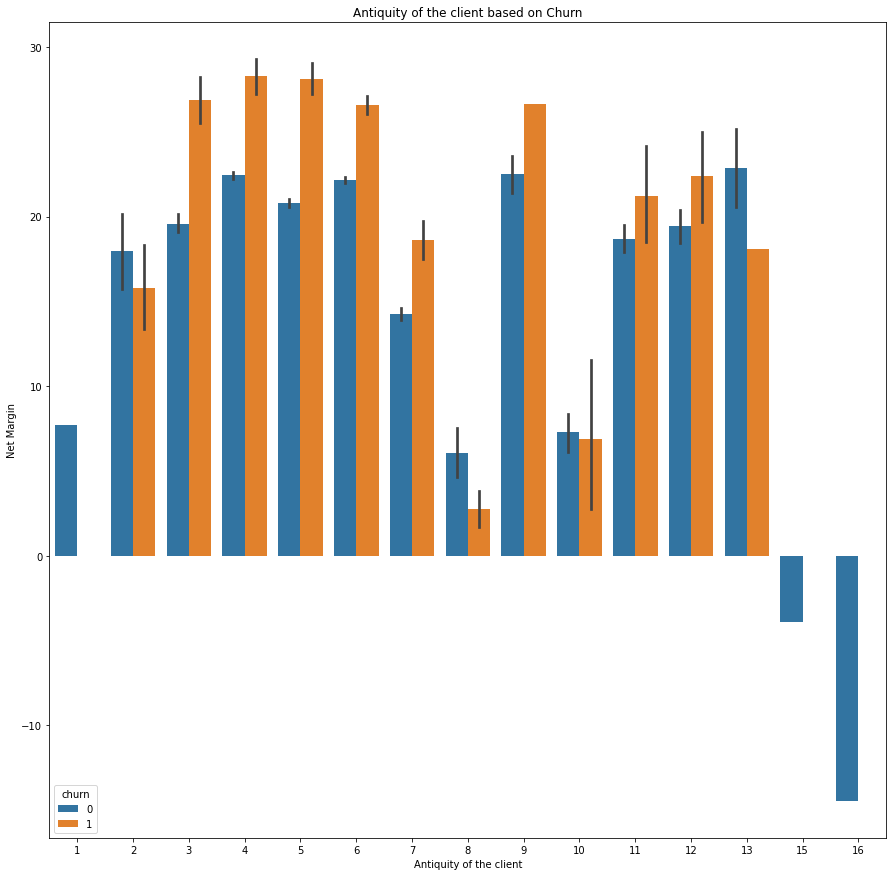

In [183]:
plt.figure(figsize=(15,15))
sns.barplot(data=customer_df, x='num_years_antig', y='margin_net_pow_ele' , hue="churn")
plt.title("Antiquity of the client based on Churn")
plt.xlabel("Antiquity of the client")
plt.ylabel("Net Margin")

Text(0, 0.5, 'Total Net Margin')

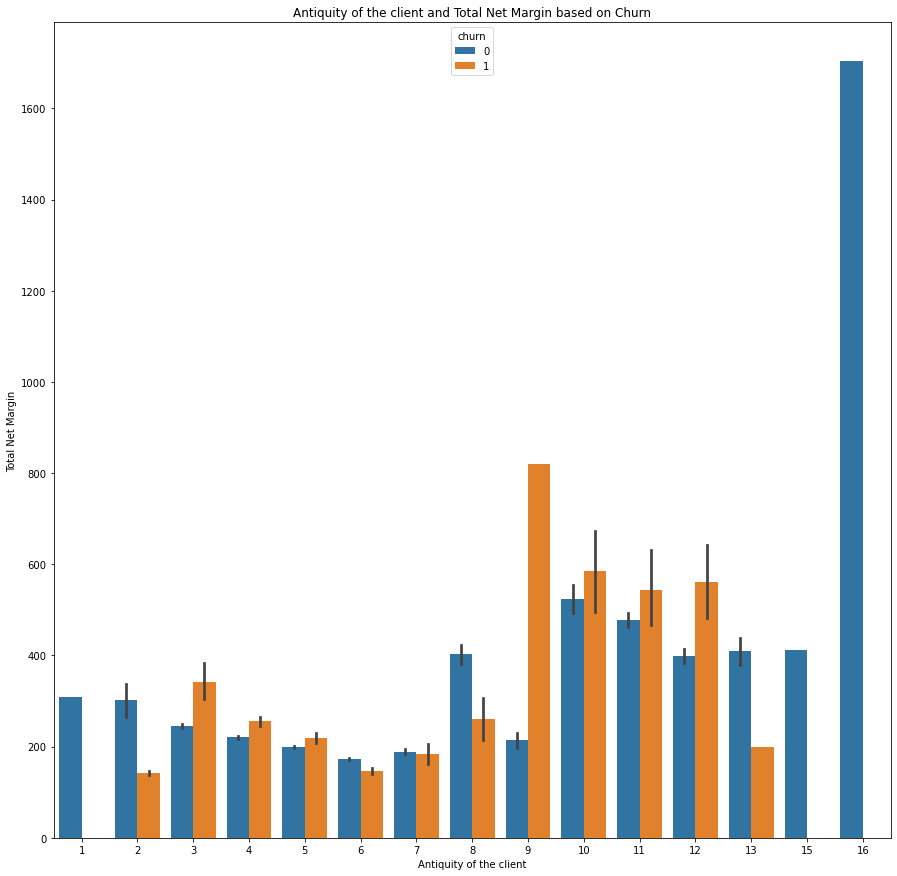

In [184]:
plt.figure(figsize=(15,15))
sns.barplot(data=customer_df, x='num_years_antig', y='net_margin' , hue="churn")
plt.title("Antiquity of the client and Total Net Margin based on Churn")
plt.xlabel("Antiquity of the client")
plt.ylabel("Total Net Margin")

### Saving the Cleaned Dataset

In [185]:
import pickle

In [186]:
pickle.dump(customer_df, open(r"D:\02_Internship\01_ Virtual Internships AU\BCG Consultants\Task 2\Data\df.pkl", "wb"))

### ~ The End